In [10]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

C:\Users\VIJAYR~1\AppData\Local\Temp/ipykernel_3860/367270308.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


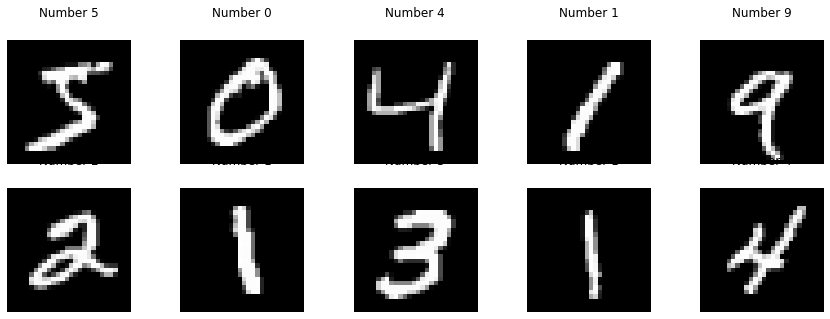

In [12]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(2,5,figsize=(15,5))
plt.gray()
for i,ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
fig.show()

In [3]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)

In [4]:
x_train.astype('float32')
x_test.astype('float32')
x_train=x_train/255
x_test=x_test/255
print('x_train shape:',x_train.shape)
print('Number of images in x_train:',x_train.shape[0])
print('Number of images in x_test:',x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train: 60000
Number of images in x_test: 10000


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [6]:
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [7]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=8)

Epoch 1/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2004 - accuracy: 0.9410
Epoch 2/8
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0828 - accuracy: 0.9745
Epoch 3/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0559 - accuracy: 0.9820
Epoch 4/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0427 - accuracy: 0.9861
Epoch 5/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0347 - accuracy: 0.9889
Epoch 6/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0287 - accuracy: 0.9902
Epoch 7/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0247 - accuracy: 0.9916
Epoch 8/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0219 - accuracy: 0.9925


In [8]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0609 - accuracy: 0.9848


[0.06090846657752991, 0.9847999811172485]